## Classification metrics

Choosing right evaluation metrics for the problem is one of the most important aspect of machine learning. Choice of metrics allows us to compare performance of different models and helps in model selection.

In this task, we will explore following metrics:
- confusion matrix
- accuracy
- precision
- recall
- f1 score

#### Dataset
The training dataset is available at "data/ozone_levels_train.csv" in the respective challenge' repo.<br>
The testing dataset is available at "data/ozone_levels_test.csv" in the respective challenge' repo.<br>

The dataset is __modified version__ of the dataset 'ozone level' on provided by UCI Machine Learning repository.

Original dataset: https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

#### Objective
To learn about classification metrics and compare logistic regression and decision tree on the same dataset

#### Tasks
- define X(input) and Y(output)
- train the decision tree model 
- train the logistic model
- construct a confusion matrix
- calculate the classification accurace
- calculate the Precision
- calculate the Recall
- calculate the F1 score
- calculate Area Under ROC Curve

#### Further fun
- Calculate precission and recall
- find the area under the curve for Roc metrics
- impliment below metrics using inbuilt librarires
        confusion matrix
        accuracy
        precision
        recall
        f1 score


#### Helpful links
- Classification metrics with google developers: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative
- classification metrics: https://www.kdnuggets.com/2020/04/performance-evaluation-metrics-classification.html
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Understanding classification metrics like Precision, Recall, F-Scores and Confusion matrices: https://nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/
- Understanding the ROC Curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Uncomment below 2 lines to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# Download data using wget if running on cloud
!wget https://github.com/DeepConnectAI/challenge-week-5/raw/master/data/ozone_levels_train.csv
!wget https://github.com/DeepConnectAI/challenge-week-5/raw/master/data/ozone_levels_test.csv

In [2]:
# Load the train and test data
train = pd.read_csv("data/ozone_levels_train.csv")
test  = pd.read_csv("data/ozone_levels_test.csv")

In [3]:
# Explore train dataset
train.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,2.5,3.5,4.4,4.6,4.4,3.5,4.2,4.5,4.2,4.6,...,0.07,26.29,-2.37,5705.0,-19.40,23.40,10315.0,-0.130416,0.00,0.0
1,1.2,0.7,0.3,0.1,0.3,0.4,0.6,1.1,1.9,2.4,...,0.24,15.80,2.10,5710.0,-17.50,19.00,10210.0,15.000000,0.00,0.0
2,0.1,0.4,0.6,0.4,1.0,1.7,0.7,1.3,2.3,2.4,...,0.12,31.64,-5.24,5745.0,-16.90,25.90,10175.0,85.000000,0.00,0.0
3,0.6,0.9,1.0,0.6,0.7,0.7,0.8,1.4,2.6,2.6,...,0.19,1.22,-0.28,5835.0,-9.55,42.15,10215.0,5.000000,0.00,0.0
4,0.1,0.4,0.3,0.1,0.1,0.0,0.9,1.9,2.0,2.0,...,0.87,1.65,1.51,5835.0,32.95,47.30,10170.0,15.000000,0.97,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F_0     1775 non-null   float64
 1   F_1     1775 non-null   float64
 2   F_2     1775 non-null   float64
 3   F_3     1775 non-null   float64
 4   F_4     1775 non-null   float64
 5   F_5     1775 non-null   float64
 6   F_6     1775 non-null   float64
 7   F_7     1775 non-null   float64
 8   F_8     1775 non-null   float64
 9   F_9     1775 non-null   float64
 10  F_10    1775 non-null   float64
 11  F_11    1775 non-null   float64
 12  F_12    1775 non-null   float64
 13  F_13    1775 non-null   float64
 14  F_14    1775 non-null   float64
 15  F_15    1775 non-null   float64
 16  F_16    1775 non-null   float64
 17  F_17    1775 non-null   float64
 18  F_18    1775 non-null   float64
 19  F_19    1775 non-null   float64
 20  F_20    1775 non-null   float64
 21  F_21    1775 non-null   float64
 22  

In [5]:
# Explore test dataset
test.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,4.0,3.7,2.9,3.6,2.4,2.9,2.0,2.0,3.2,3.8,...,0.47,27.66,11.94,5605.0,10.70,31.95,10240.0,10.0,0.0,0.0
1,2.2,2.9,3.4,4.2,4.7,4.7,5.3,4.9,5.2,6.0,...,0.20,19.22,18.21,5515.0,-10.10,42.00,10065.0,25.0,0.0,0.0
2,2.7,2.2,2.3,2.5,2.6,2.9,3.2,2.9,3.6,4.2,...,0.10,14.22,-2.98,5690.0,0.70,32.70,10105.0,-55.0,0.0,0.0
3,1.5,1.3,1.8,1.4,1.2,1.7,1.6,1.4,1.6,3.0,...,0.54,13.07,9.15,5820.0,1.95,39.35,10220.0,-25.0,0.0,0.0
4,2.6,2.7,2.2,1.4,1.6,1.9,2.6,3.5,4.2,4.5,...,0.26,-1.52,-4.53,5910.0,27.70,43.70,10110.0,-30.0,0.0,0.0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F_0     761 non-null    float64
 1   F_1     761 non-null    float64
 2   F_2     761 non-null    float64
 3   F_3     761 non-null    float64
 4   F_4     761 non-null    float64
 5   F_5     761 non-null    float64
 6   F_6     761 non-null    float64
 7   F_7     761 non-null    float64
 8   F_8     761 non-null    float64
 9   F_9     761 non-null    float64
 10  F_10    761 non-null    float64
 11  F_11    761 non-null    float64
 12  F_12    761 non-null    float64
 13  F_13    761 non-null    float64
 14  F_14    761 non-null    float64
 15  F_15    761 non-null    float64
 16  F_16    761 non-null    float64
 17  F_17    761 non-null    float64
 18  F_18    761 non-null    float64
 19  F_19    761 non-null    float64
 20  F_20    761 non-null    float64
 21  F_21    761 non-null    float64
 22  F_

In [33]:
# Define X and y
X_train = train.drop(columns='class')
X_test  = test.drop(columns='class')
y_train = train['class']
y_test  = test['class']

In [34]:
# Print shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1775, 72)
(761, 72)
(1775,)
(761,)


In [49]:
# Initialize the models
# Classifier 1 - Logistic regression
clf1 = LogisticRegression()
# Classifier 2 - Decision tree
clf2 = DecisionTreeClassifier()

In [50]:
# Train both the models on training dataset
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)


C:\Users\RAGHAV VERMA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTreeClassifier()

In [51]:
# Predict on testing data
y_pred_lr = clf1.predict(X_test)
y_pred_dt = clf2.predict(X_test)

### Primary building blocks of classification metrics

A __TRUE POSITIVE (TP)__ is an outcome where the model correctly predicts the positive class.

A __TRUE NEGATIVE (TN)__ is an outcome where the model correctly predicts the negative class.

A __FALSE POSITIVE (FP)__ is an outcome where the model incorrectly predicts the positive class.

a __FALSE NEGATIVE (FN)__ is an outcome where the model incorrectly predicts the negative class.

In [52]:
# Compute primary metrics for logisitc regression
# NOTE: All metrics are to be calculated on test dataset
# True Positive
lr_true_positive = np.where(np.logical_and(y_pred_lr==1,y_test==1))[0].size
# True Negative
lr_true_negative = np.where(np.logical_and(y_pred_lr==0,y_test==0))[0].size
# False Positive
lr_false_positive = np.where(np.logical_and(y_pred_lr==1,y_test==0))[0].size
# False Negative
lr_false_negative = np.where(np.logical_and(y_pred_lr==0,y_test==1))[0].size

In [53]:
# Compute primary metrics for decision tree
# True Positive
dt_true_positive = np.where(np.logical_and(y_pred_dt==1,y_test==1))[0].size
# True Negative
dt_true_negative = np.where(np.logical_and(y_pred_dt==0,y_test==0))[0].size
# False Positive
dt_false_positive = np.where(np.logical_and(y_pred_dt==1,y_test==0))[0].size
# False Negative
dt_false_negative = np.where(np.logical_and(y_pred_dt==0,y_test==1))[0].size

### Confusion matrix
A confusion matrix is visualization technique to summarize the basic performance of a classification algorithm.

![Confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg "Confusion matric diagram")

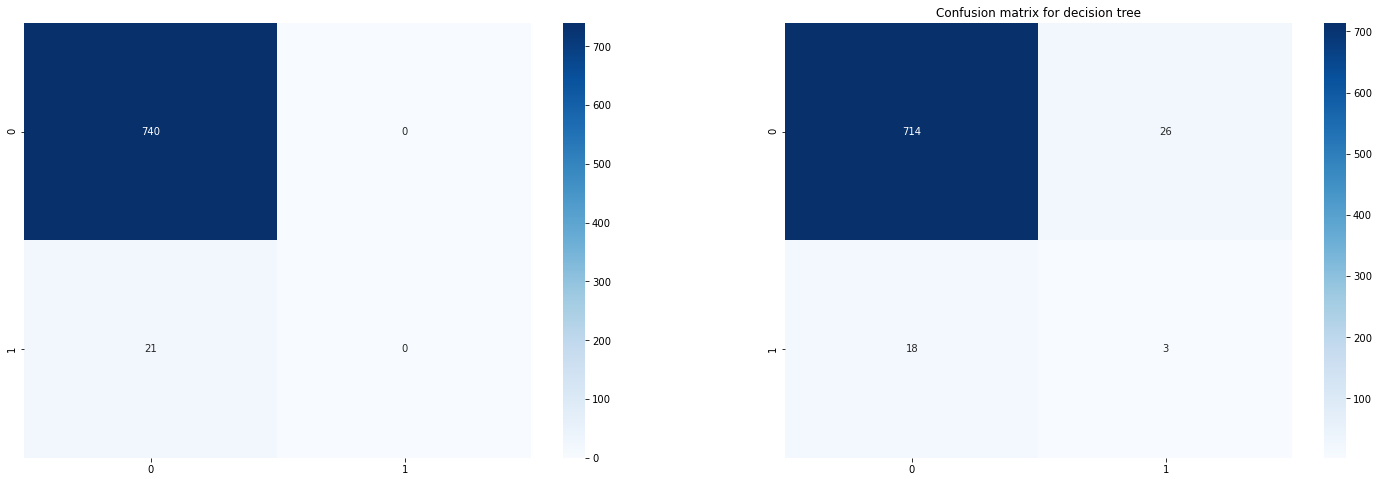

In [54]:
# Plot confusion matrix, DO NOT EDIT THE CELL
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.title("Confusion matrix for logistic regression")
sns.heatmap(np.array([[lr_true_negative, lr_false_positive],[lr_false_negative, lr_true_positive]]), annot=True, cmap=plt.cm.Blues, fmt='g', ax=axes[0])
plt.title("Confusion matrix for decision tree")
sns.heatmap(np.array([[dt_true_negative, dt_false_positive],[dt_false_negative, dt_true_positive]]), annot=True, cmap=plt.cm.Blues, fmt='g', ax=axes[1])

plt.show()

### Accuracy 
Classification accuracy is simply the rate of correct classifications
$$Accuracy = \frac{Number \, of \, correct \, predictions}{Total \, number \, of \, predictions}$$
<br>
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [55]:
# Classification accuracy for logistic regression
lr_accuracy = (lr_true_positive+lr_true_negative)/(lr_true_positive+lr_true_negative+lr_false_positive+lr_false_negative)
# Classification accuracy for decision tree
dt_accuracy = (dt_true_positive+dt_true_negative)/(dt_true_positive+dt_true_negative+dt_false_positive+dt_false_negative)

In [56]:
print("Classificaton accuracy: LR = " , lr_accuracy)
print("Classificaton accuracy: DT = " , dt_accuracy)

Classificaton accuracy: LR =  0.9724047306176085
Classificaton accuracy: DT =  0.9421813403416557


### Precision
What proportion of positive identifications was actually correct?
$$Precision = \frac{TP}{TP+FP}$$

In [57]:
# Precision for logistic regression
try:
    lr_precision = lr_true_positive/(lr_true_positive/lr_false_positive)
except:
    lr_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for logistic regression turned out to be 0 ")
# Precision for decision tree
try:
    dt_precision = dt_true_positive/(dt_true_positive+dt_false_positive)
except:
    dt_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for decision tree turned out to be 0 ")

If you see this message, it means that the
denominator of precision for logistic regression turned out to be 0 


In [58]:
print("Precision: LR = " , lr_precision)
print("Precision: DT = " , dt_precision)

Precision: LR =  0
Precision: DT =  0.10344827586206896


### Recall
What proportion of actual positives was identified correctly?
$$Recall = \frac{TP}{TP+FN}$$

In [61]:
# Recall for logistic regression
try:
    lr_recall = lr_true_positive/(lr_true_positive+lr_false_negative)
except:
    lr_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for logistic regression turned out to be 0 ")
# Recall for decision tree
try:
    dt_recall = dt_true_positive/(dt_true_positive+dt_false_negative)
except:
    dt_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for decision tree turned out to be 0 ")

In [62]:
print("Recall: LR = " , lr_recall)
print("Recall: DT = " , dt_recall)

Recall: LR =  0.0
Recall: DT =  0.14285714285714285


### F1 score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
$$ F1 \, score = \frac{2* Precision * Recall}{Precision + Recall}$$

In [64]:
# F1 score for logistic regression
try:
    lr_f1_score = 2*lr_precision*lr_recall/(lr_precision+lr_recall)
except:
    lr_f1_score=0
# F1 score for decision tree
dt_f1_score = 2*dt_precision*dt_recall/(dt_precision+dt_recall)

In [65]:
print("F1 score: LR = " , lr_f1_score)
print("F1 score: DT = " , dt_f1_score)

F1 score: LR =  0
F1 score: DT =  0.12000000000000001


### Area Under ROC Curve
A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [106]:
from sklearn.metrics import roc_curve
lr_false_positive_rate, lr_true_positive_rate, thresh1 = roc_curve(y_test, clf1.predict_proba(X_test)[:,1], pos_label=1)
dt_false_positive_rate, dt_true_positive_rate, thresh2 = roc_curve(y_test, clf2.predict_proba(X_test)[:,1], pos_label=1)

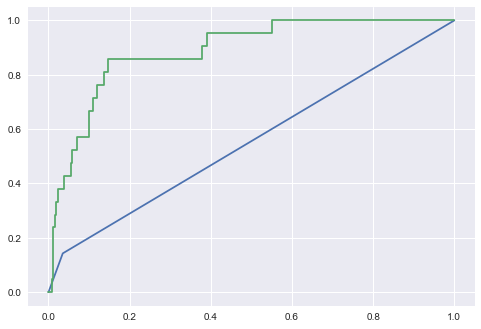

In [108]:
# TODO: Plot the ROC curve
plt.plot(dt_false_positive_rate,dt_true_positive_rate)
plt.plot(lr_false_positive_rate,lr_true_positive_rate)
plt.show()